### Imports

In [1]:
from data_process.file_wrapper import FileWrapper
from data_process.signal_tools import signal_filter, signal_manip
from data_process.utils import get_by_path
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation
import math
%matplotlib widget

### Load data

In [2]:
data = FileWrapper('/home/ntkot/theses/ros/bag_db/data_28_08_2023__23_00_37/split1_1/split1_1.pkl')
time_ranges = [[690.75, 693.25],  # 0
               [247, 249.5],      # 1
               [180.6, 182.75],   # 2
               [16, 20],          # 3
               [429, 431],        # 4
               [69, 71],          # 5
               [427.5, 431],      # 6
               [709.5, 710.75]]   # 7
time_range = time_ranges[7]

# data = FileWrapper('/home/ntkot/theses/ros/bag_db/data_28_08_2023__23_00_37/split2_2/split2_2.pkl')
# time_ranges = [[99,101]]
# time_range = time_ranges[0]

mv_window = 20
wien_window = 100
wien_mv_window = 6

a_x = get_by_path(data.data, ['/imu/static_calib', 'linear_acceleration', 'x'])
a_x_mv   = signal_filter.moving_average(a_x, window_length=mv_window)
a_x_wien = signal_filter.wiener(a_x, window_length=wien_window)
a_x_wien_mv = signal_filter.moving_average(a_x_wien, window_length=wien_mv_window)
a_y = get_by_path(data.data, ['/imu/static_calib', 'linear_acceleration', 'y'])
a_y_mv = signal_filter.moving_average(a_y, window_length=mv_window)
a_y_wien = signal_filter.wiener(a_y, window_length=wien_window)
a_y_wien_mv = signal_filter.moving_average(a_y_wien, window_length=wien_mv_window)
a_z = get_by_path(data.data, ['/imu/static_calib', 'linear_acceleration', 'z'])
a_z_mv = signal_filter.moving_average(a_z, window_length=mv_window)
a_z_wien = signal_filter.wiener(a_z, window_length=wien_window)
a_z_wien_mv = signal_filter.moving_average(a_z_wien, window_length=wien_mv_window)

imu_time = get_by_path(data.data, ['/imu/static_calib', 'time'])
imu_sample_rate = 1 / np.average(imu_time[1:len(imu_time)] - imu_time[0:len(imu_time)-1])

gps_time = get_by_path(data.data, ['/gps/gprmc', 'time'])
gps_sample_rate = 1 / np.average(gps_time[1:len(gps_time)] - gps_time[0:len(gps_time)-1])

ground_speed = get_by_path(data.data, ['/gps/gprmc', 'ground_speed_kmh']) / 3.6
ground_speed_filtered = signal_filter.moving_average(ground_speed, window_length=4)

ground_accel = (ground_speed[1:len(ground_speed)] - ground_speed[0:len(ground_speed)-1]) * gps_sample_rate
ground_accel = np.insert(ground_accel, 0, 0)
ground_accel_filtered = (ground_speed_filtered[1:len(ground_speed_filtered)] - \
                         ground_speed_filtered[0:len(ground_speed_filtered)-1]) * gps_sample_rate
ground_accel_filtered = np.insert(ground_accel_filtered, 0, 0)

track_angle = get_by_path(data.data, ['/gps/gprmc', 'track_deg'])

Loading from pickle file...


### Plot original data

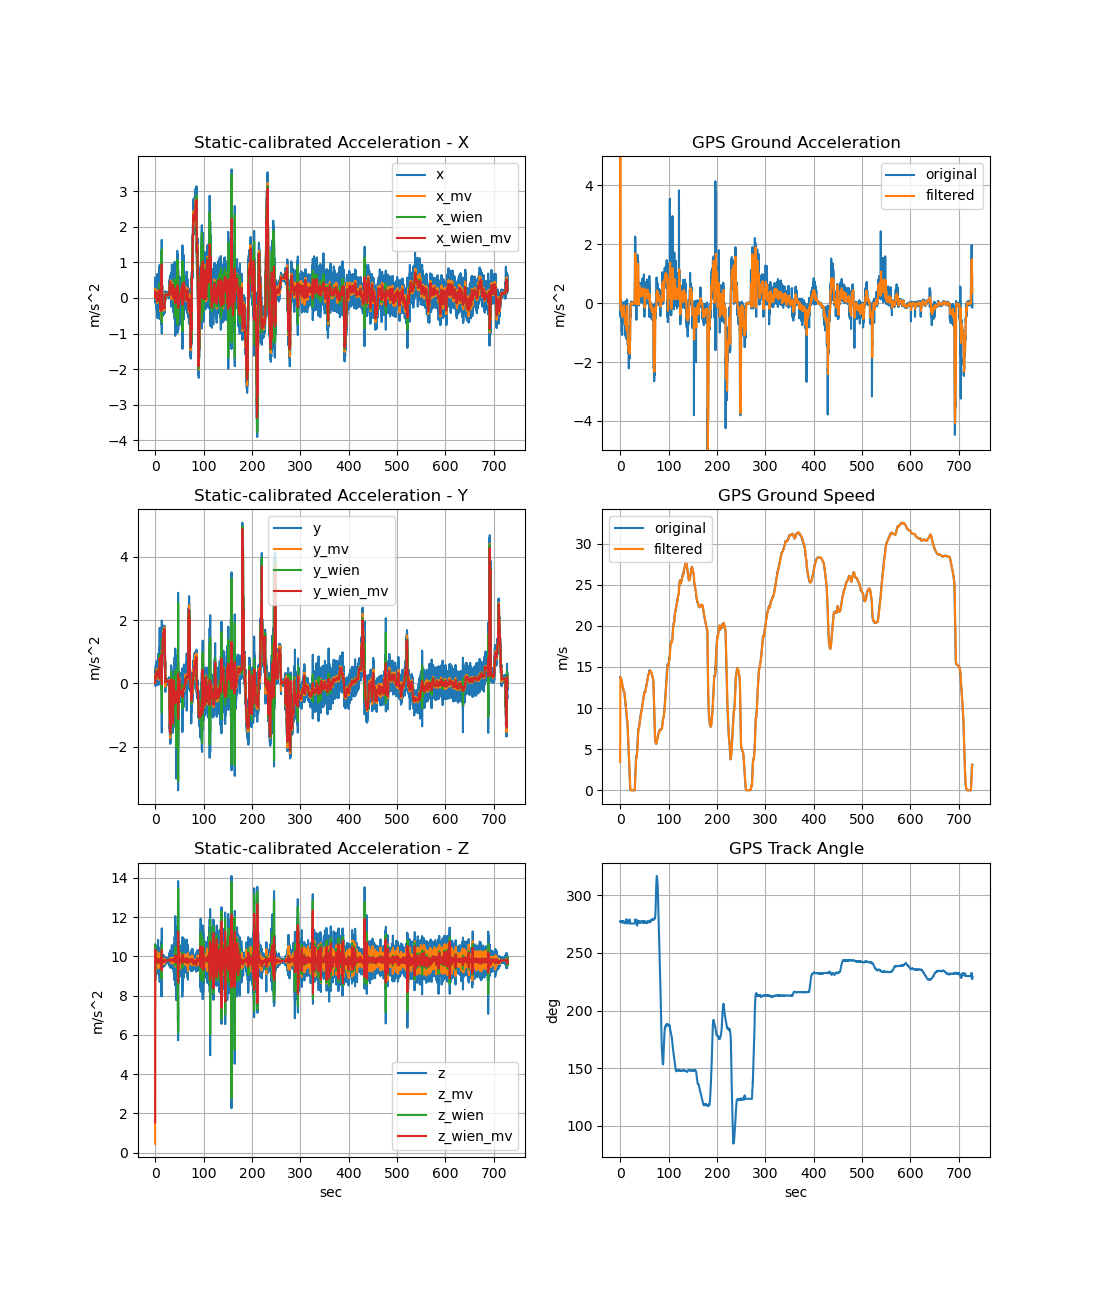

In [3]:
fig = plt.figure(1)
fig.clear()
fig, ax = plt.subplots(num=1, nrows=3, ncols=2, sharex='all')

ax[0][0].plot(imu_time, a_x)
ax[0][0].plot(imu_time, a_x_mv)
ax[0][0].plot(imu_time, a_x_wien)
ax[0][0].plot(imu_time, a_x_wien_mv)
ax[0][0].grid(which='both', axis='both')
ax[0][0].legend(['x','x_mv','x_wien','x_wien_mv'])
ax[0][0].tick_params(labelbottom=True)
ax[0][0].set_ylabel('m/s^2')
ax[0][0].set_title('Static-calibrated Acceleration - X')

ax[1][0].plot(imu_time, a_y)
ax[1][0].plot(imu_time, a_y_mv)
ax[1][0].plot(imu_time, a_y_wien)
ax[1][0].plot(imu_time, a_y_wien_mv)
ax[1][0].grid(which='both', axis='both')
ax[1][0].legend(['y','y_mv','y_wien','y_wien_mv'])
ax[1][0].tick_params(labelbottom=True)
ax[1][0].set_ylabel('m/s^2')
ax[1][0].set_title('Static-calibrated Acceleration - Y')

ax[2][0].plot(imu_time, a_z)
ax[2][0].plot(imu_time, a_z_mv)
ax[2][0].plot(imu_time, a_z_wien)
ax[2][0].plot(imu_time, a_z_wien_mv)
ax[2][0].grid(which='both', axis='both')
ax[2][0].legend(['z','z_mv','z_wien','z_wien_mv'])
ax[2][0].set_xlabel('sec')
ax[2][0].tick_params(labelbottom=True)
ax[2][0].set_ylabel('m/s^2')
ax[2][0].set_title('Static-calibrated Acceleration - Z')

ax[0][1].plot(gps_time, ground_accel)
ax[0][1].plot(gps_time, ground_accel_filtered)
ax[0][1].grid(which='both', axis='both')
ax[0][1].legend(['original', 'filtered'])
ax[0][1].tick_params(labelbottom=True)
ax[0][1].set_ylabel('m/s^2')
ax[0][1].set_ylim(-5,5)
ax[0][1].set_title('GPS Ground Acceleration')

ax[1][1].plot(gps_time, ground_speed)
ax[1][1].plot(gps_time, ground_speed_filtered)
ax[1][1].grid(which='both', axis='both')
ax[1][1].legend(['original', 'filtered'])
ax[1][1].tick_params(labelbottom=True)
ax[1][1].set_ylabel('m/s')
ax[1][1].set_title('GPS Ground Speed')

ax[2][1].plot(gps_time, track_angle)
ax[2][1].grid(which='both', axis='both')
ax[2][1].set_xlabel('sec')
ax[2][1].tick_params(labelbottom=True)
ax[2][1].set_ylabel('deg')
ax[2][1].set_title('GPS Track Angle')

fig.set_size_inches(11,13)

plt.show()

### Slice data

In [4]:
imu_time_slice, a_slice = signal_manip.slice(time=imu_time, signal=[a_x,
                                                                    a_x_mv,
                                                                    a_x_wien,
                                                                    a_x_wien_mv,
                                                                    a_y, 
                                                                    a_y_mv,
                                                                    a_y_wien,
                                                                    a_y_wien_mv,
                                                                    a_z,
                                                                    a_z_mv,
                                                                    a_z_wien,
                                                                    a_z_wien_mv], time_range=time_range)
a_x_slice = a_slice[0]
a_x_mv_slice = a_slice[1]
a_x_wien_slice = a_slice[2]
a_x_wien_mv_slice = a_slice[3]

a_y_slice = a_slice[4]
a_y_mv_slice = a_slice[5]
a_y_wien_slice = a_slice[6]
a_y_wien_mv_slice = a_slice[7]

a_z_slice = a_slice[8]
a_z_mv_slice = a_slice[9]
a_z_wien_slice = a_slice[10]
a_z_wien_mv_slice = a_slice[11]



gps_time_slice, gps_slice = signal_manip.slice(time=gps_time, signal=[ground_speed, 
                                                                      ground_speed_filtered,
                                                                      ground_accel, 
                                                                      ground_accel_filtered,
                                                                      track_angle], time_range=time_range)
ground_speed_slice = gps_slice[0]
ground_speed_filtered_slice = gps_slice[1]

ground_accel_slice = gps_slice[2]
ground_accel_filtered_slice = gps_slice[3]

track_angle_slice = gps_slice[4]

### Plot sliced data

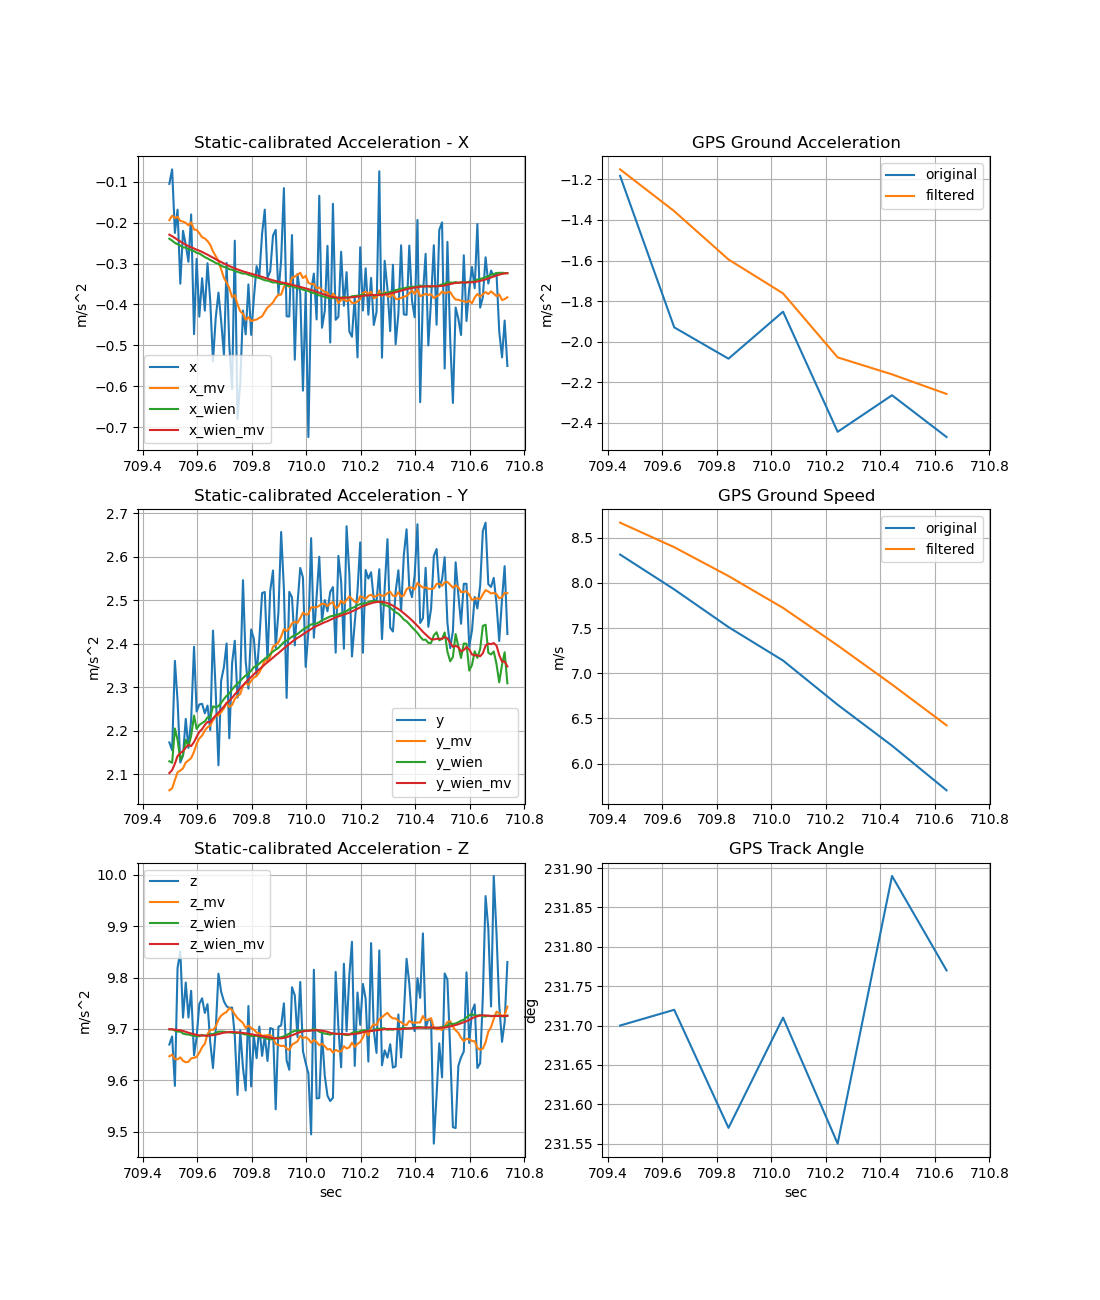

In [5]:
slice_fig = plt.figure(2)
slice_fig.clear()
slice_fig, slice_ax = plt.subplots(num=2, nrows=3, ncols=2, sharex='all', layout='tight')

slice_ax[0][0].plot(imu_time_slice, a_x_slice)
slice_ax[0][0].plot(imu_time_slice, a_x_mv_slice)
slice_ax[0][0].plot(imu_time_slice, a_x_wien_slice)
slice_ax[0][0].plot(imu_time_slice, a_x_wien_mv_slice)
slice_ax[0][0].grid(which='both', axis='both')
slice_ax[0][0].legend(['x','x_mv','x_wien','x_wien_mv'])
slice_ax[0][0].tick_params(labelbottom=True)
slice_ax[0][0].set_ylabel('m/s^2')
slice_ax[0][0].set_title('Static-calibrated Acceleration - X')

slice_ax[1][0].plot(imu_time_slice, a_y_slice)
slice_ax[1][0].plot(imu_time_slice, a_y_mv_slice)
slice_ax[1][0].plot(imu_time_slice, a_y_wien_slice)
slice_ax[1][0].plot(imu_time_slice, a_y_wien_mv_slice)
slice_ax[1][0].grid(which='both', axis='both')
slice_ax[1][0].legend(['y','y_mv','y_wien','y_wien_mv'])
slice_ax[1][0].tick_params(labelbottom=True)
slice_ax[1][0].set_ylabel('m/s^2')
slice_ax[1][0].set_title('Static-calibrated Acceleration - Y')

slice_ax[2][0].plot(imu_time_slice, a_z_slice)
slice_ax[2][0].plot(imu_time_slice, a_z_mv_slice)
slice_ax[2][0].plot(imu_time_slice, a_z_wien_slice)
slice_ax[2][0].plot(imu_time_slice, a_z_wien_mv_slice)
slice_ax[2][0].grid(which='both', axis='both')
slice_ax[2][0].legend(['z','z_mv','z_wien','z_wien_mv'])
slice_ax[2][0].set_xlabel('sec')
slice_ax[2][0].tick_params(labelbottom=True)
slice_ax[2][0].set_ylabel('m/s^2')
slice_ax[2][0].set_title('Static-calibrated Acceleration - Z')

slice_ax[0][1].plot(gps_time_slice, ground_accel_slice)
slice_ax[0][1].plot(gps_time_slice, ground_accel_filtered_slice)
slice_ax[0][1].grid(which='both', axis='both')
slice_ax[0][1].legend(['original', 'filtered'])
slice_ax[0][1].tick_params(labelbottom=True)
slice_ax[0][1].set_ylabel('m/s^2')
slice_ax[0][1].set_title('GPS Ground Acceleration')

slice_ax[1][1].plot(gps_time_slice, ground_speed_slice)
slice_ax[1][1].plot(gps_time_slice, ground_speed_filtered_slice)
slice_ax[1][1].grid(which='both', axis='both')
slice_ax[1][1].legend(['original', 'filtered'])
slice_ax[1][1].tick_params(labelbottom=True)
slice_ax[1][1].set_ylabel('m/s')
slice_ax[1][1].set_title('GPS Ground Speed')

slice_ax[2][1].plot(gps_time_slice, track_angle_slice)
slice_ax[2][1].grid(which='both', axis='both')
slice_ax[2][1].set_xlabel('sec')
slice_ax[2][1].tick_params(labelbottom=True)
slice_ax[2][1].set_ylabel('deg')
slice_ax[2][1].set_title('GPS Track Angle')

slice_fig.set_size_inches(11,13)

plt.show()

### Perform calibration

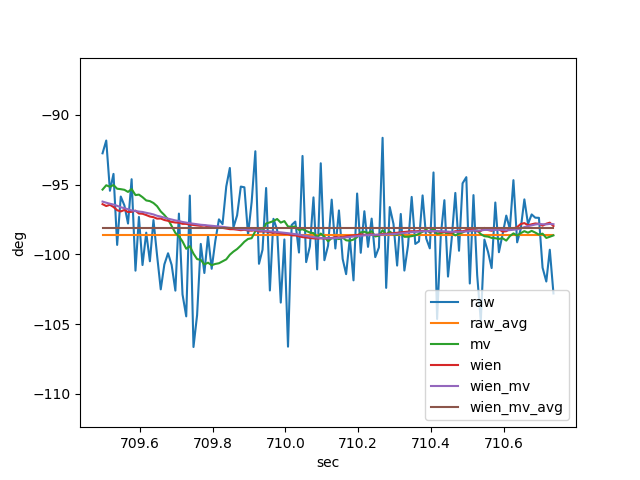

In [6]:
#
z_angle_raw = np.arctan2(-a_y_slice, a_x_slice) * 180 / np.pi

#
z_angle_raw_avg = math.atan2(-np.average(a_y_slice),  np.average(a_x_slice)) * 180 / np.pi

#
z_angle_mv = np.arctan2(-a_y_mv_slice, a_x_mv_slice) * 180 / np.pi

#
z_angle_wien = np.arctan2(-a_y_wien_slice, a_x_wien_slice) * 180 / np.pi

#
z_angle_wien_mv = np.arctan2(-a_y_wien_mv_slice, a_x_wien_mv_slice) * 180 / np.pi

#
z_angle_wien_mv_avg = np.arctan2(-np.average(a_y_wien_mv_slice), np.average(a_x_wien_mv_slice)) * 180 / np.pi

angle_fig = plt.figure(3)
angle_fig.clear()

plt.plot(imu_time_slice, z_angle_raw)
plt.plot(imu_time_slice, z_angle_raw_avg * np.ones(len(imu_time_slice)))
plt.plot(imu_time_slice, z_angle_mv)
plt.plot(imu_time_slice, z_angle_wien)
plt.plot(imu_time_slice, z_angle_wien_mv)
plt.plot(imu_time_slice, z_angle_wien_mv_avg * np.ones(len(imu_time_slice)))
plt.legend(['raw', 'raw_avg', 'mv', 'wien', 'wien_mv', 'wien_mv_avg'])
plt.xlabel('sec')
plt.ylabel('deg')
_, _, ymin, ymax = plt.axis()
plt.ylim(ymin - 5, ymax + 5)

plt.show()

### Apply found rotation to data and plot them

In [7]:
z_angle = z_angle_wien_mv_avg * math.pi / 180
print(f'Z-angle found: {z_angle * 180 / math.pi:.2f}°')

cosz = math.cos(z_angle)
sinz = math.sin(z_angle)
rot = Rotation.from_matrix([[cosz, -sinz, 0],
                            [sinz,  cosz, 0],
                            [   0,     0, 1]])

a_x_rot,         a_y_rot,         a_z_rot         = rot.apply(np.array([a_x,         a_y,         a_z]).T).T
a_x_mv_rot,      a_y_mv_rot,      a_z_mv_rot      = rot.apply(np.array([a_x_mv,      a_y_mv,      a_z_mv]).T).T
a_x_wien_rot,    a_y_wien_rot,    a_z_wien_rot    = rot.apply(np.array([a_x_wien,    a_y_wien,    a_z_wien]).T).T
a_x_wien_mv_rot, a_y_wien_mv_rot, a_z_wien_mv_rot = rot.apply(np.array([a_x_wien_mv, a_y_wien_mv, a_z_wien_mv]).T).T

a_x_slice_rot,         a_y_slice_rot,         a_z_slice_rot         = rot.apply(np.array([a_x_slice,         a_y_slice,         a_z_slice]).T).T
a_x_mv_slice_rot,      a_y_mv_slice_rot,      a_z_mv_slice_rot      = rot.apply(np.array([a_x_mv_slice,      a_y_mv_slice,      a_z_mv_slice]).T).T
a_x_wien_slice_rot,    a_y_wien_slice_rot,    a_z_wien_slice_rot    = rot.apply(np.array([a_x_wien_slice,    a_y_wien_slice,    a_z_wien_slice]).T).T
a_x_wien_mv_slice_rot, a_y_wien_mv_slice_rot, a_z_wien_mv_slice_rot = rot.apply(np.array([a_x_wien_mv_slice, a_y_wien_mv_slice, a_z_wien_mv_slice]).T).T

Z-angle found: -98.11°


### Plot rotated original data

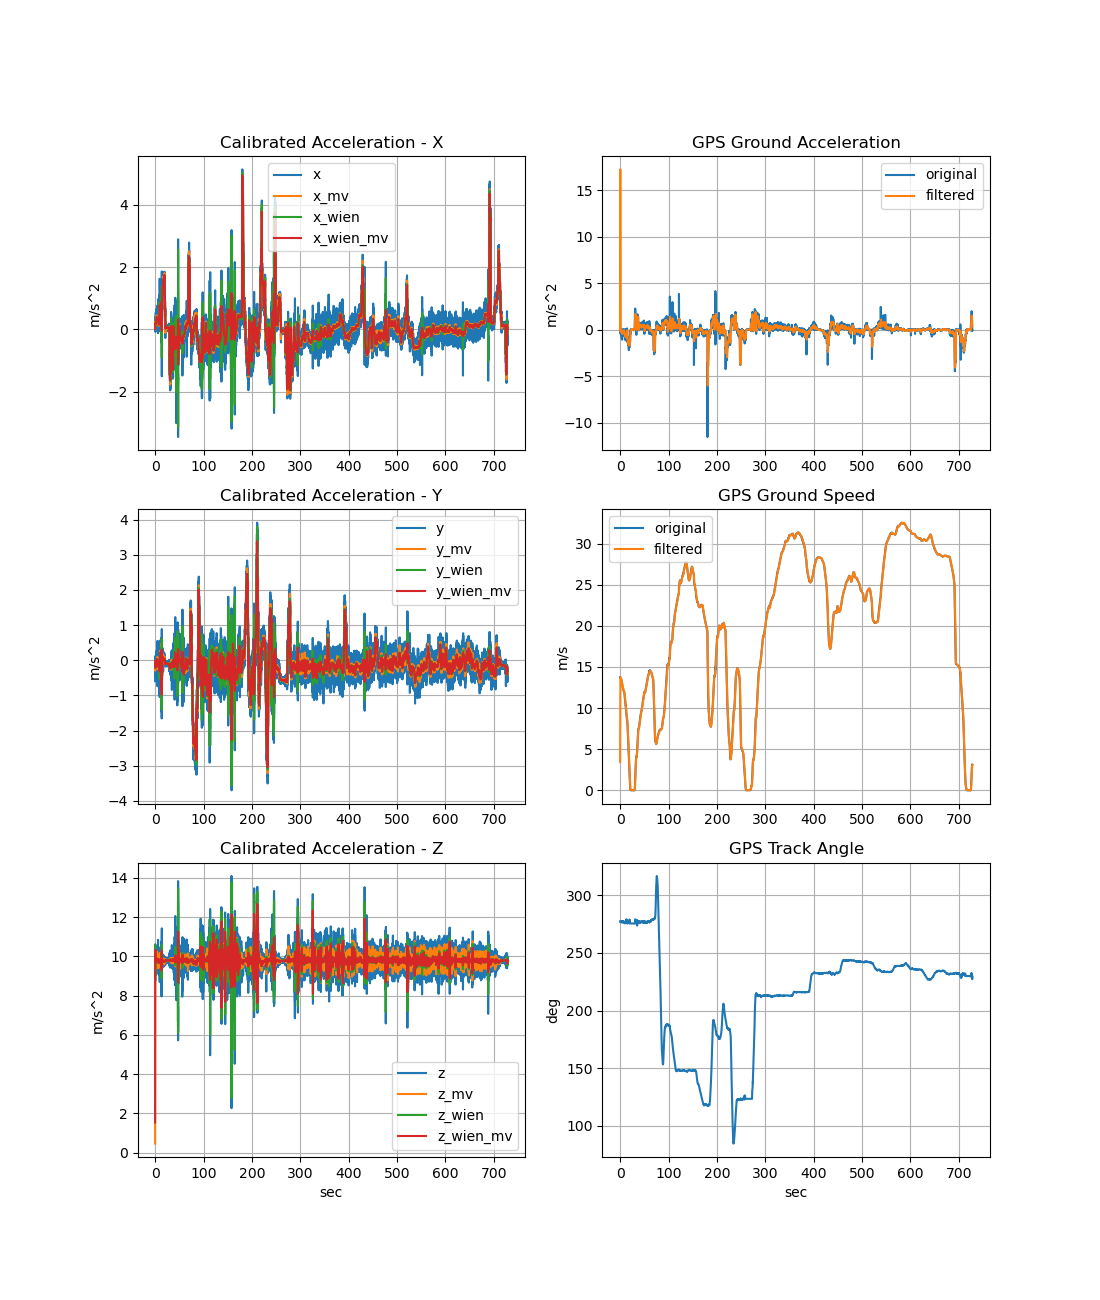

In [8]:
rot_fig = plt.figure(4)
rot_fig.clear()
rot_fig, rot_ax = plt.subplots(num=4, nrows=3, ncols=2, sharex='all')

# xlim = time_ranges[5]
# xlim[0] += -2
# xlim[1] +=  2
# rot_ax[0][0].set_xlim(*xlim)

rot_ax[0][0].plot(imu_time, a_x_rot)
rot_ax[0][0].plot(imu_time, a_x_mv_rot)
rot_ax[0][0].plot(imu_time, a_x_wien_rot)
rot_ax[0][0].plot(imu_time, a_x_wien_mv_rot)
rot_ax[0][0].grid(which='both', axis='both')
rot_ax[0][0].legend(['x','x_mv','x_wien','x_wien_mv'])
rot_ax[0][0].tick_params(labelbottom=True)
rot_ax[0][0].set_ylabel('m/s^2')
rot_ax[0][0].set_title('Calibrated Acceleration - X')

rot_ax[1][0].plot(imu_time, a_y_rot)
rot_ax[1][0].plot(imu_time, a_y_mv_rot)
rot_ax[1][0].plot(imu_time, a_y_wien_rot)
rot_ax[1][0].plot(imu_time, a_y_wien_mv_rot)
rot_ax[1][0].grid(which='both', axis='both')
rot_ax[1][0].legend(['y','y_mv','y_wien','y_wien_mv'])
rot_ax[1][0].tick_params(labelbottom=True)
rot_ax[1][0].set_ylabel('m/s^2')
rot_ax[1][0].set_title('Calibrated Acceleration - Y')

rot_ax[2][0].plot(imu_time, a_z_rot)
rot_ax[2][0].plot(imu_time, a_z_mv_rot)
rot_ax[2][0].plot(imu_time, a_z_wien_rot)
rot_ax[2][0].plot(imu_time, a_z_wien_mv_rot)
rot_ax[2][0].grid(which='both', axis='both')
rot_ax[2][0].legend(['z','z_mv','z_wien','z_wien_mv'])
rot_ax[2][0].set_xlabel('sec')
rot_ax[2][0].tick_params(labelbottom=True)
rot_ax[2][0].set_ylabel('m/s^2')
rot_ax[2][0].set_title('Calibrated Acceleration - Z')

rot_ax[0][1].plot(gps_time, ground_accel)
rot_ax[0][1].plot(gps_time, ground_accel_filtered)
rot_ax[0][1].grid(which='both', axis='both')
rot_ax[0][1].legend(['original', 'filtered'])
rot_ax[0][1].tick_params(labelbottom=True)
rot_ax[0][1].set_ylabel('m/s^2')
rot_ax[0][1].set_title('GPS Ground Acceleration')

rot_ax[1][1].plot(gps_time, ground_speed)
rot_ax[1][1].plot(gps_time, ground_speed_filtered)
rot_ax[1][1].grid(which='both', axis='both')
rot_ax[1][1].legend(['original', 'filtered'])
rot_ax[1][1].tick_params(labelbottom=True)
rot_ax[1][1].set_ylabel('m/s')
rot_ax[1][1].set_title('GPS Ground Speed')

rot_ax[2][1].plot(gps_time, track_angle)
rot_ax[2][1].grid(which='both', axis='both')
rot_ax[2][1].set_xlabel('sec')
rot_ax[2][1].tick_params(labelbottom=True)
rot_ax[2][1].set_ylabel('deg')
rot_ax[2][1].set_title('GPS Track Angle')

rot_fig.set_size_inches(11,13)

plt.show()